In [13]:
# importing data processing tools: pandas and numpy
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [14]:
# get titanic files as a DataFrame
tit_data = pd.read_csv("https://raw.githubusercontent.com/adasegroup/ML2023_seminars/master/seminar1/titanic/train.csv")

In [15]:
tit_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
Y = tit_data.Survived

In [17]:
tit_data = tit_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)

In [18]:
tit_data = pd.get_dummies(tit_data)

In [19]:
tit_data.isnull().sum()

Pclass          0
Age           177
SibSp           0
Parch           0
Fare            0
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [20]:
tit_data = tit_data.fillna({'Age': tit_data.Age.median()})

In [21]:
tit_data.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [22]:
tit_data.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [23]:
X = tit_data

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [25]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,28.0,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [26]:
clf = DecisionTreeClassifier(criterion='entropy')

In [27]:
clf.fit(X_train, Y_train);

In [28]:
clf.score(X_train, Y_train)

0.9798657718120806

In [29]:
clf.score(X_test, Y_test)

0.7762711864406779

In [30]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [31]:
clf.fit(X_train, Y_train);

In [32]:
clf.score(X_train, Y_train)

0.8238255033557047

In [33]:
clf.score(X_test, Y_test)

0.8203389830508474

In [34]:
max_depth_values = range(1, 100)

In [35]:
scores_data = pd.DataFrame()

In [36]:
scores_data

""


In [37]:
for max_depth in max_depth_values:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, Y_train);
    train_score = clf.score(X_train, Y_train)
    test_score = clf.score(X_test, Y_test)
    mean_cross_val_score = cross_val_score(clf, X_train, Y_train, cv=10).mean()
    
    temp_score_data = pd.DataFrame({'max_depth' : [max_depth], 
                                    'train_score' : [train_score], 
                                    'test_score' : [test_score],
                                    'cross_val_score' : [mean_cross_val_score]
                                   })
    scores_data = pd.concat([scores_data, temp_score_data])

In [38]:
scores_data

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.782006
0,2,0.805369,0.776271,0.803616
0,3,0.823826,0.820339,0.815452
0,4,0.833893,0.823729,0.791893
0,5,0.840604,0.810169,0.771921
...,...,...,...,...
0,95,0.979866,0.779661,0.770282
0,96,0.979866,0.772881,0.772034
0,97,0.979866,0.776271,0.770282
0,98,0.979866,0.766102,0.771949


In [39]:
scores_data_long = pd.melt(scores_data, id_vars = ['max_depth'],
value_vars = ['train_score','test_score', 'cross_val_score'],
var_name = 'set_type', value_name = 'score')
scores_data_long

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604
...,...,...,...
292,95,cross_val_score,0.770282
293,96,cross_val_score,0.772034
294,97,cross_val_score,0.770282
295,98,cross_val_score,0.771949


In [40]:
scores_data_long.query("set_type == 'cross_val_score'").head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.782006
199,2,cross_val_score,0.803616
200,3,cross_val_score,0.815452
201,4,cross_val_score,0.791893
202,5,cross_val_score,0.771921
203,6,cross_val_score,0.795395
204,7,cross_val_score,0.808729
205,8,cross_val_score,0.810395
206,9,cross_val_score,0.802034
207,10,cross_val_score,0.795367


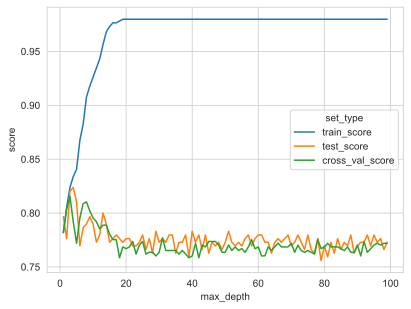

In [41]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long);

In [42]:
best_clf = DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [43]:
cross_val_score(best_clf, X_test, Y_test, cv=10).mean()

0.775632183908046

In [44]:
clf = DecisionTreeClassifier()

In [45]:
parametrs = {'criterion' : ['gini', 'entropy'], 'max_depth' : range(1,30)}

In [46]:
grid_search_cv_clf = GridSearchCV(clf, parametrs, cv=10)

In [47]:
grid_search_cv_clf.fit(X_train, Y_train);

In [48]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [49]:
best_grid_clf = grid_search_cv_clf.best_estimator_

In [50]:
best_grid_clf.score(X_test, Y_test)

0.8203389830508474

In [51]:
Y_pred = best_grid_clf.predict(X_test);

In [52]:
precision_score(Y_test, Y_pred)

0.8252427184466019

In [53]:
recall_score(Y_test, Y_pred)

0.7083333333333334

In [54]:
Y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0], dtype=int64)

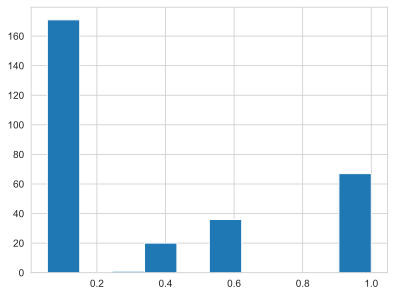

In [55]:
Y_predicted_prrobability = best_grid_clf.predict_proba(X_test);
pd.Series(Y_predicted_prrobability[:, 1]).hist();

In [56]:
pd.Series(Y_predicted_prrobability[:, 1]).unique()

array([0.13855422, 0.97142857, 0.55555556, 0.37777778, 0.05555556,
       1.        , 0.25      ])

In [57]:
Y_pred = np.where(Y_predicted_prrobability[:, 1] > 0.8, 1, 0)

In [58]:
precision_score(Y_test, Y_pred)

0.9104477611940298

In [59]:
recall_score(Y_test, Y_pred)

0.5083333333333333

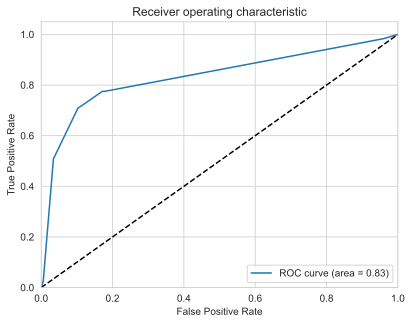

In [60]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_predicted_prrobability[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1] , 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right");

In [61]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=100, min_samples_leaf=10)

In [62]:
clf.fit(X_train, Y_train);

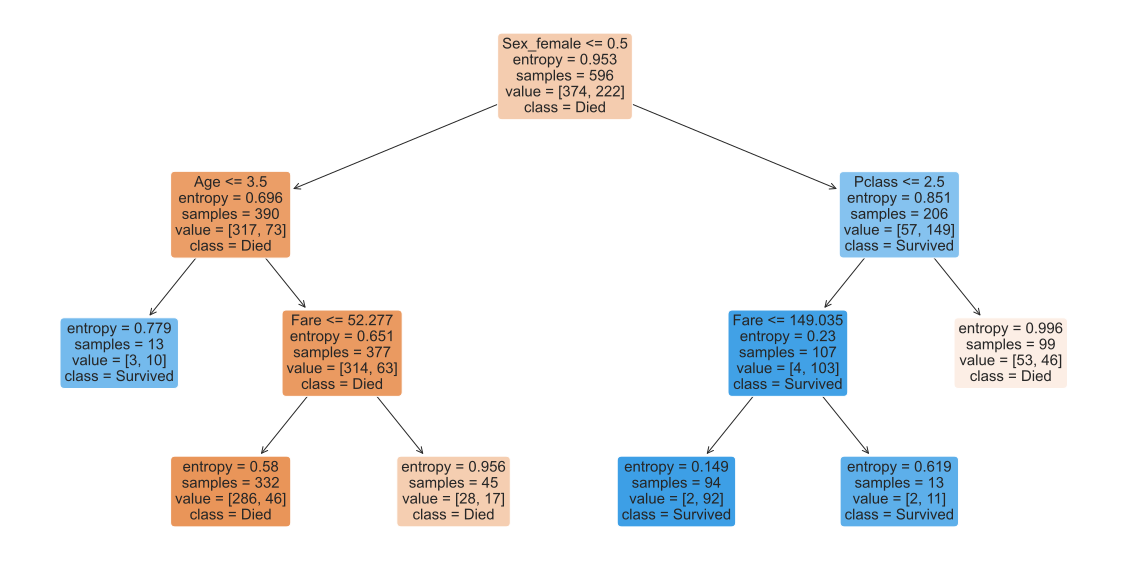

In [63]:
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, 
               feature_names=list(X), 
               class_names=['Died', 'Survived'], 
               filled=True,
               rounded=True,
               fontsize = 15)
plt.show()






# Random Forest

In [64]:
clf_rf = RandomForestClassifier()

In [65]:
parametrs = {'n_estimators': [10, 20, 30], 'max_depth': [2, 3, 5, 7, 10]}

In [66]:
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=5)

In [67]:
grid_search_cv_clf.fit(X_train, Y_train);

In [68]:
grid_search_cv_clf.best_params_

{'max_depth': 5, 'n_estimators': 30}

In [69]:
best_rf_clf = grid_search_cv_clf.best_estimator_

In [70]:
best_rf_clf.score(X_test, Y_test)

0.8135593220338984

In [71]:
feature_importances = best_rf_clf.feature_importances_

In [72]:
feature_importances_df = pd.DataFrame({'features': list(X_train),
                                    'feature_importances': feature_importances})

In [73]:
feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
6,Sex_male,0.268142
5,Sex_female,0.213849
0,Pclass,0.151559
4,Fare,0.138662
1,Age,0.090097
2,SibSp,0.041221
3,Parch,0.038731
9,Embarked_S,0.026829
7,Embarked_C,0.023709
8,Embarked_Q,0.007200


# KNN

In [74]:
first_knn = KNeighborsClassifier()

In [75]:
np.mean(cross_val_score(first_knn, X_train, Y_train, cv=5))

0.6913025210084035

In [76]:
knn_params = {'n_neighbors': [1,2,3,4,55,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}

In [77]:
knn_grid = GridSearchCV(first_knn, knn_params, cv=5)

In [78]:
%%time
knn_grid.fit(X_train, Y_train)

CPU times: total: 797 ms
Wall time: 793 ms


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 55, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20]})

In [79]:
best_knn_clf = knn_grid.best_estimator_

In [80]:
best_knn_clf.score(X_test, Y_test)

0.7084745762711865